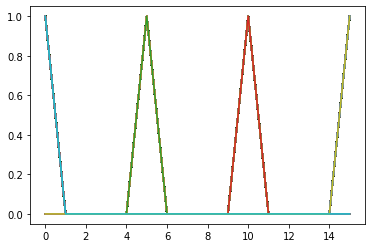

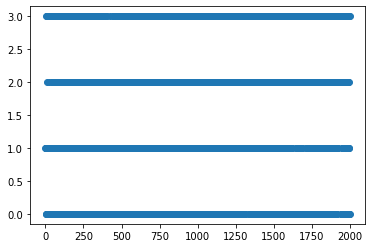

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([534.,   0.,   0.,   0.,   0., 475.,   0.,   0.,   0.,   0., 487.,
         0.,   0.,   0.,   0., 504.])

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

seed = 1680458526
rng = np.random.default_rng(seed=seed)

n =2 
m =2 
epochs = 2000 

x_min = 0
x_max = 2**n 
x_arr = rng.integers(x_min, x_max, size=epochs)
fx_arr = [x for x in x_arr]

arr = np.zeros(2**(n+m))

i = 0
for i in np.arange(len(x_arr)):
    target_arr = np.zeros(2**(n+m))
    index = int(np.binary_repr(x_arr[i],n)+np.binary_repr(fx_arr[i],m),2)
    target_arr[index]=1 

    arr += target_arr

    plt.plot(np.arange(2**(n+m)), target_arr)

plt.show()    

plt.scatter(np.arange(len(x_arr)),x_arr)
plt.show()

print(target_arr)

arr

In [2]:
str(bin(4))[2:]

'100'

In [18]:
from tools import generate_network 

circ = generate_network(2,3, 8)
num_CX = dict(circ.decompose(reps=4).count_ops())["cx"]
num_gates = num_CX + dict(circ.decompose(reps=4).count_ops())["u"]

print(num_CX, num_gates)

76 207


In [20]:
x =int("111",2)

x

7

In [23]:
for i in range(4):
    #print(bin(2*i +1))
    print(bin(i))

0b0
0b1
0b10
0b11


In [49]:
import numpy as np

L =6

print("IN 0")
for i in np.arange(L):

            if i % 3 ==0:
                print("AA")
            elif i % 3 ==1:
                print("NN")
            elif i % 3 ==2:
                # alternate between layers with control states 0 and 1 
                if i % 2 == 0:
                    print("IN 1")
                elif i % 2 == 1:
                    print("IN 0")



IN 0
AA
NN
IN 1
AA
NN
IN 0


In [3]:
str ="x**2"

f= lambda x: eval(str) 

f(2)

4

In [29]:
import numpy as np 

n=2 
m=3

max = 2**(n+m)

x_arr = np.arange(2**n)
f_arr = [x**2 for x in x_arr]

print(np.log2(np.max(f_arr)))

if np.log2(np.max(f_arr))> m:
    raise ValueError(f"Insufficient number of target qubits: at least {int(np.ceil(np.log2(np.max(f_arr))))} required")

for i in range(2**n):
    #print(int(np.binary_repr(f_arr[i],m)+np.binary_repr(x_arr[i],n),2))
    #print(np.binary_repr(f_arr[i],m)+np.binary_repr(x_arr[i],n))
    print(np.binary_repr(f_arr[i]))

#print(np.binary_repr(f_arr))    


3.169925001442312


ValueError: Insufficient number of target qubits: at least 4 required

In [21]:
import argparse 

parser = argparse.ArgumentParser(usage='', description="Train and test the QCNN.")   
parser.add_argument('-n','--n', help="Number of input qubits.", default=2, type=int)
parser.add_argument('-m','--m', help="Number of target qubits.", default=2, type=int)
parser.add_argument('-L','--L', help="Number of network layers. If multiple values given will execute sequentially.", default=[6],type=int, nargs="+")
parser.add_argument('-l','--loss', help="Loss function.", default="CE", choices=["CE", "MSE", "L1", "KLD"])
parser.add_argument('-f','--f', help="Function to evaluate (variable: x).", default="x")
parser.add_argument('-fs','--f_str', help="String describing function.")
parser.add_argument('-e','--epochs', help="Number of epochs.", default=300,type=int)
parser.add_argument('-M','--meta', help="String with meta data.", default="")

parser.add_argument('--seed', help="Random seed.", default=1680458526,type=int)
parser.add_argument('--lr', help="Learning rate.", default=0.01,type=float)
parser.add_argument('--b1', help="Adam optimizer b1 parameter.", default=0.7,type=float)
parser.add_argument('--b2', help="Adam optimizer b2 parameter.", default=0.999,type=float)
parser.add_argument('--shots', help="Number of shots used by sampler.", default=300,type=int)


opt = parser.parse_args(["-n", "4", "-L", "6", "9", "12", "-e" ,"100"])

if opt.f_str==None:
    opt.f_str=opt.f 

print(opt.f_str)

x


In [46]:
import numpy as np

arr = np.empty(5)
np.save("test", arr)

arr2 = np.load("test.npy")

print(arr)

[0. 0. 0. 0. 0.]


In [77]:
import numpy as np

rec = np.load("outputs/loss_2_2_1_300_x_CE_.npy") 
norev =np.load("outputs/loss_2_2_1_300_x_CE_N.npy")

x =rec -norev

np.max(x)

#np.argwhere(x >0)

0.013113737106323242

In [78]:
from tools import check_duplicates 

check_duplicates(2,2,1,300,"x", "CE", "")